# Exemplo para Análise de Risco de Crédito Bancário

### Objetivo

Simular um sistema de decisão automatizado que avalia o **risco de crédito** de um cliente com base em duas informações principais:
- O **limite de crédito** pretendido;
- O **histórico de pagamento** do cliente.

Esse sistema utiliza **lógica fuzzy** para lidar com situações em que os dados não são exatos ou binários. O resultado da análise é uma **prioridade de risco** classificada como **baixo**, **médio** ou **alto**.

### Contexto de Negócio

O banco deseja:
- Conceder crédito de forma mais segura, avaliando melhor os clientes.
- Automatizar o processo de decisão para agilizar aprovações.
- Minimizar os riscos de inadimplência.
- Maximizar a carteira de crédito sem comprometer a saúde financeira da instituição.

### Variáveis fuzzy do sistema

- **Entrada 1:** `limite_credito`  
  Faixa de valores: R$ 0 a R$ 100.000  
  Rótulos fuzzy: `baixo`, `médio`, `alto`

- **Entrada 2:** `historico_pagamento`  
  Faixa de valores: 0 a 100 (índice de confiabilidade)  
  Rótulos fuzzy: `ruim`, `médio`, `bom`

- **Saída:** `risco`  
  Faixa de valores: 0 a 100  
  Rótulos fuzzy: `baixo`, `médio`, `alto`  
  → Quanto mais alto o risco, menor a chance de aprovação de crédito.

### Requisitos para executar o código

Certifique-se de instalar o pacote `scikit-fuzzy`:

Com Conda:
```
conda install conda-forge::scikit-fuzzy
```

ou Pip:
```
pip install scikit-fuzzy
```

In [2]:
# Na primeira execução, instale o scikit-fuzzy. Basta descomentar a linha abaixo.
# !pip install -U scikit-fuzzy

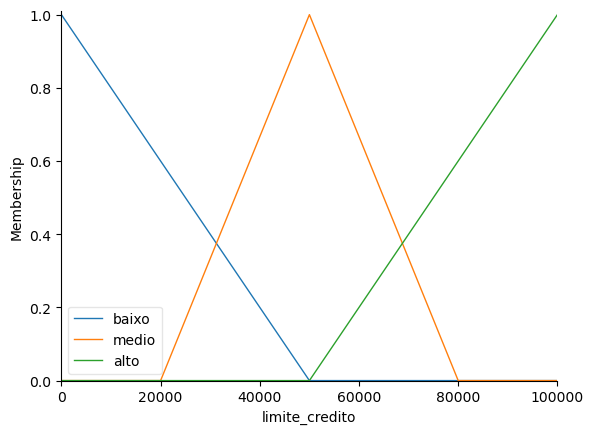

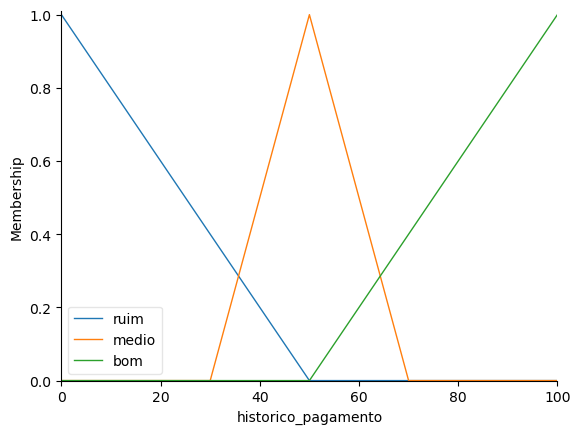

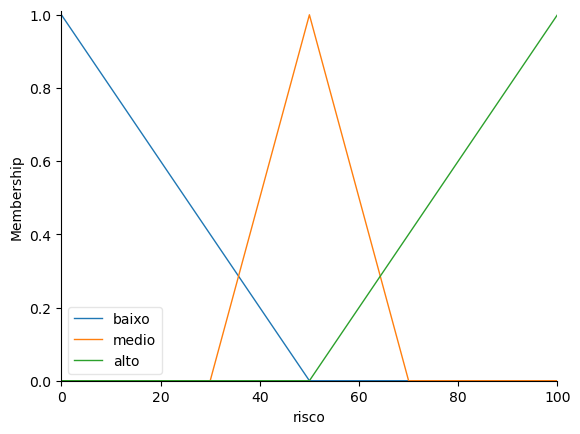

In [4]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Definindo as variáveis de entrada e saída do sistema fuzzy
limite_credito = ctrl.Antecedent(np.arange(0, 100001, 1000), 'limite_credito')
historico_pagamento = ctrl.Antecedent(np.arange(0, 101, 1), 'historico_pagamento')

risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

# Funções de pertinência para 'limite_credito'
limite_credito['baixo'] = fuzz.trimf(limite_credito.universe, [0, 0, 50000])
limite_credito['medio'] = fuzz.trimf(limite_credito.universe, [20000, 50000, 80000])
limite_credito['alto'] = fuzz.trimf(limite_credito.universe, [50000, 100000, 100000])

# Funções de pertinência para 'historico_pagamento'
historico_pagamento['ruim'] = fuzz.trimf(historico_pagamento.universe, [0, 0, 50])
historico_pagamento['medio'] = fuzz.trimf(historico_pagamento.universe, [30, 50, 70])
historico_pagamento['bom'] = fuzz.trimf(historico_pagamento.universe, [50, 100, 100])

# Funções de pertinência para 'risco'
risco['baixo'] = fuzz.trimf(risco.universe, [0, 0, 50])
risco['medio'] = fuzz.trimf(risco.universe, [30, 50, 70])
risco['alto'] = fuzz.trimf(risco.universe, [50, 100, 100])

# Visualização das funções de pertinência (opcional)
limite_credito.view()
historico_pagamento.view()
risco.view()


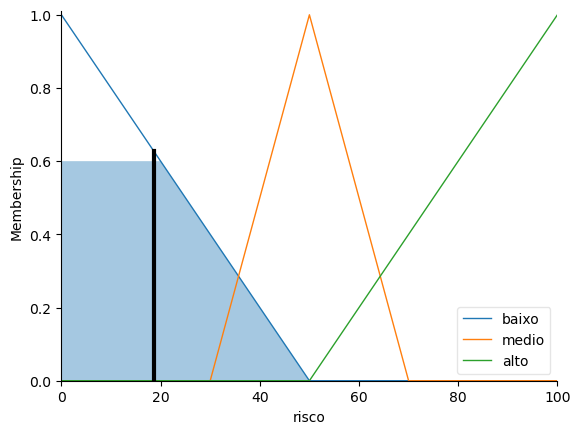

Risco calculado: 18.571428571428573


In [9]:
# Definindo as regras fuzzy
regra1 = ctrl.Rule(limite_credito['baixo'] & historico_pagamento['ruim'], risco['alto'])
regra2 = ctrl.Rule(limite_credito['baixo'] & historico_pagamento['bom'], risco['medio'])
regra3 = ctrl.Rule(limite_credito['medio'] & historico_pagamento['ruim'], risco['alto'])
regra4 = ctrl.Rule(limite_credito['medio'] & historico_pagamento['medio'], risco['medio'])
regra5 = ctrl.Rule(limite_credito['medio'] & historico_pagamento['bom'], risco['baixo'])
regra6 = ctrl.Rule(limite_credito['alto'] & historico_pagamento['ruim'], risco['medio'])
regra7 = ctrl.Rule(limite_credito['alto'] & historico_pagamento['bom'], risco['baixo'])

# Criando o sistema de controle e a simulação
controle_risco = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7])
simulacao_risco = ctrl.ControlSystemSimulation(controle_risco)

# Exemplo de entrada: Limite de crédito de 30000 e histórico de pagamento de 40
simulacao_risco.input['limite_credito'] = 80000
simulacao_risco.input['historico_pagamento'] = 98

# Computa o resultado do sistema fuzzy
simulacao_risco.compute()

# Visualiza o resultado na função de pertinência de risco
risco.view(sim=simulacao_risco)
plt.show()

# Exibe o resultado do risco calculado
print("Risco calculado:", simulacao_risco.output['risco'])